In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

In [2]:

# Read csv with semicolon as separator and one or more whitespaces after the semicolon
df = pd.read_csv('https://envirocar.org/api/stable/tracks/5e24ca2463c90936dc7b2d94.csv', sep=';\s+', engine='python')
df.head()

,id,CO2(kg/h),GPS Bearing(deg),GPS Altitude(m),GPS HDOP(precision),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude,time
0,5e24ca2463c90936dc7b2d96,4.094951,0.0,122.000004,1.673726,1.742532,0.0,0.0,802.239994,15.0,1.947453,44.999999,2.621179,6.746507,29.0,5.300929,35.294118,7.646327,51.955395,2020-01-17T15:58:38Z
1,5e24ca2463c90936dc7b2d98,4.055918,0.0,121.999996,2.995812,1.725923,0.0,0.0,794.593085,15.0,3.972881,45.000000,5.052044,6.346000,29.0,5.250401,36.078431,7.646326,51.955392,2020-01-17T15:58:43Z
2,5e24ca2463c90936dc7b2d99,3.982729,0.0,122.000000,0.980315,1.694778,0.0,0.0,795.346734,15.0,1.743307,43.999999,2.051968,6.000000,28.0,5.155657,35.920368,7.646326,51.955393,2020-01-17T15:58:48Z
3,5e24ca2463c90936dc7b2d9a,4.007283,0.0,121.999998,1.518887,1.705227,0.0,0.0,800.250000,15.0,1.600000,44.000000,2.159443,5.393491,28.0,5.187442,35.445185,7.646326,51.955393,2020-01-17T15:58:53Z
4,5e24ca2463c90936dc7b2d9b,4.019175,0.0,121.999998,3.971486,1.710287,0.0,0.0,792.191601,15.0,4.800000,44.579489,6.200000,7.772321,28.0,5.202837,35.480658,7.646326,51.955393,2020-01-17T15:58:58Z


In [3]:

# Convert dates to datetime
df.time = pd.to_datetime(df.time, format = '%Y-%m-%dT%H:%M:%SZ')

# Set date as index
df.set_index('time', inplace=True)

In [4]:

# Show variable types
df.dtypes

id                        object
CO2(kg/h)                float64
GPS Bearing(deg)         float64
GPS Altitude(m)          float64
GPS HDOP(precision)      float64
Consumption(l/h)         float64
Speed(km/h)              float64
GPS Speed(km/h)          float64
Rpm(u/min)               float64
Throttle Position(%)     float64
GPS VDOP(precision)      float64
Intake Pressure(kPa)     float64
GPS PDOP(precision)      float64
GPS Accuracy(%)          float64
Intake Temperature(c)    float64
Calculated MAF(g/s)      float64
Engine Load(%)           float64
longitude                float64
latitude                 float64
dtype: object

In [11]:
df

,id,CO2(kg/h),GPS Bearing(deg),GPS Altitude(m),GPS HDOP(precision),Consumption(l/h),Speed(km/h),GPS Speed(km/h),Rpm(u/min),Throttle Position(%),GPS VDOP(precision),Intake Pressure(kPa),GPS PDOP(precision),GPS Accuracy(%),Intake Temperature(c),Calculated MAF(g/s),Engine Load(%),longitude,latitude
time,,,,,,,,,,,,,,,,,,,
2020-01-17 15:58:38,5e24ca2463c90936dc7b2d96,4.094951,0.000000,122.000004,1.673726,1.742532,0.0,0.000000,802.239994,15.0,1.947453,44.999999,2.621179,6.746507,29.000000,5.300929,35.294118,7.646327,51.955395
2020-01-17 15:58:43,5e24ca2463c90936dc7b2d98,4.055918,0.000000,121.999996,2.995812,1.725923,0.0,0.000000,794.593085,15.0,3.972881,45.000000,5.052044,6.346000,29.000000,5.250401,36.078431,7.646326,51.955392
2020-01-17 15:58:48,5e24ca2463c90936dc7b2d99,3.982729,0.000000,122.000000,0.980315,1.694778,0.0,0.000000,795.346734,15.0,1.743307,43.999999,2.051968,6.000000,28.000000,5.155657,35.920368,7.646326,51.955393
2020-01-17 15:58:53,5e24ca2463c90936dc7b2d9a,4.007283,0.000000,121.999998,1.518887,1.705227,0.0,0.000000,800.250000,15.0,1.600000,44.000000,2.159443,5.393491,28.000000,5.187442,35.445185,7.646326,51.955393
2020-01-17 15:58:58,5e24ca2463c90936dc7b2d9b,4.019175,0.000000,121.999998,3.971486,1.710287,0.0,0.000000,792.191601,15.0,4.800000,44.579489,6.200000,7.772321,28.000000,5.202837,35.480658,7.646326,51.955393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-17 16:05:51,5e24ca2463c90936dc7b2dd8,3.781639,26.654929,98.346075,1.033602,1.609208,9.0,5.845183,692.900000,15.0,1.500805,46.999999,1.900805,16.913481,22.000000,4.895346,34.831196,7.638311,51.957937
2020-01-17 16:05:56,5e24ca2463c90936dc7b2dd9,5.149422,351.809005,92.864671,1.573814,2.191243,9.0,4.121591,930.858379,16.0,2.147629,47.639055,2.747629,16.067666,22.000001,6.665945,39.284086,7.638327,51.957991
2020-01-17 16:06:11,5e24ca2463c90936dc7b2dda,4.281626,272.907354,126.499501,3.853175,1.821968,0.0,4.224870,819.378366,15.0,3.079762,45.000000,4.893056,24.929493,21.999999,5.542580,35.476595,7.636856,51.958161


In [6]:
df.shape

(70, 19)

In [7]:
df["Speed(km/h)"].unique()


array([ 0.        , 14.0171432 ,  4.90555552, 25.90395403, 25.99999923,
       31.        , 29.00000054, 27.        , 26.9999992 , 26.        ,
       25.        , 28.        , 27.99999958, 27.99999917, 29.        ,
       25.96986258, 17.16896552, 15.00000034,  8.03809525,  3.00000006,
        3.        ,  2.        ,  9.20273986, 18.70904702, 16.22488014,
       19.00000028, 19.98058275, 23.00000069,  3.88505738,  8.76377952,
       10.        , 10.0000003 ,  9.22252774,  7.99999997,  4.00000003,
        4.63586956, 11.00000033, 10.99999967, 13.        ,  7.0000001 ,
        8.99999973,  9.00000027,         nan])

In [8]:
dfmm = [[51.9554958 ,  7.6461123 ],
       [51.9554958 ,  7.6461123 ],
       [51.9554958 ,  7.6461123 ],
       [51.9554958 ,  7.6461123 ],
       [51.9554958 ,  7.6461123 ],
       [51.9554958 ,  7.6461123 ],
       [51.9554958 ,  7.6461123 ],
       [51.9554958 ,  7.6461123 ],
       [51.9555423 ,  7.645929  ],
       [51.9555654 ,  7.6458108 ],
       [51.9555836 ,  7.6457191 ],
       [51.95565614,  7.64538682],
       [51.95580941,  7.64485731],
       [51.95601224,  7.64428657],
       [51.95620764,  7.64376431],
       [51.95639365,  7.64324691],
       [51.95658972,  7.64272363],
       [51.95676291,  7.64228406],
       [51.95694527,  7.6418073 ],
       [51.9571198 ,  7.6413325 ],
       [51.95712434,  7.64132243],
       [51.95733508,  7.64085593],
       [51.9575391 ,  7.6404769 ],
       [51.95777846,  7.63998053],
       [51.958022  ,  7.6394755 ],
       [51.9580114 ,  7.6393544 ],
       [51.9581338 ,  7.6390948 ],
       [51.9581801 ,  7.6389969 ],
       [51.9581801 ,  7.6389969 ],
       [51.9581801 ,  7.6389969 ],
       [51.9581801 ,  7.6389969 ],
       [51.9581801 ,  7.6389969 ],
       [51.9581801 ,  7.6389969 ],
       [51.9581908 ,  7.63897311],
       [51.95819104,  7.63897259],
       [51.9581914 ,  7.63897178],
       [51.95819207,  7.6389703 ],
       [51.95821286,  7.63892409],
       [51.95821333,  7.63892304],
       [51.95822708,  7.63889251],
       [51.9583533 ,  7.638612  ],
       [51.95841137,  7.63827981],
       [51.958408  ,  7.6382763 ],
       [51.9583893 ,  7.6382562 ],
       [51.9582976 ,  7.6381771 ],
       [51.958224  ,  7.638131  ],
       [51.95779027,  7.63798535],
       [51.95759766,  7.63792067],
       [51.95759265,  7.63791899],
       [51.95759261,  7.63791897],
       [51.9575911 ,  7.63791846],
       [51.957484  ,  7.6378825 ],
       [51.95741762,  7.63785478],
       [51.9574306 ,  7.6377602 ],
       [51.95743458,  7.63772879],
       [51.95743864,  7.63750815],
       [51.9574389 ,  7.6374659 ],
       [51.9574377 ,  7.6376598 ],
       [51.9574344 ,  7.6377327 ],
       [51.9574306 ,  7.6377602 ],
       [51.957484  ,  7.6378825 ],
       [51.95781892,  7.63799497],
       [51.95801803,  7.63806183],
       [51.95820259,  7.63812381],
       [51.9575253 ,  7.6378409 ],
       [51.9576988 ,  7.6378943 ],
       [51.9577683 ,  7.6378726 ],
       [51.9578739 ,  7.6379067 ],
       [51.9580308 ,  7.63795061],
       [51.95804421,  7.63795437]]



In [9]:
pip install "notebook>=5.3" "ipywidgets>=7.2"

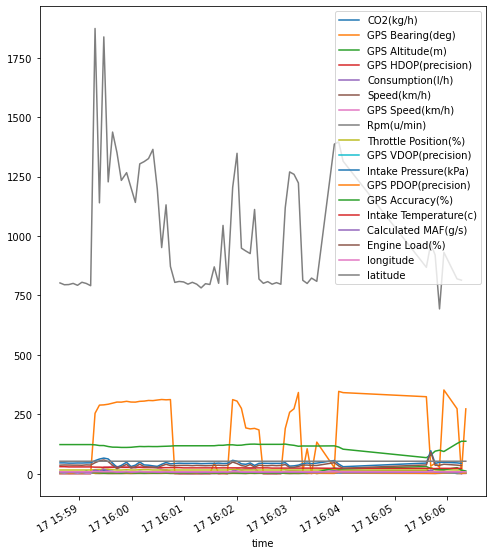

In [10]:
# df.plot(figsize=(8, 10))
#import plotly.express as px
#import plotly.graph_objects as go
#df["latitude"].unique()
#df["longitude"]
#d = {'lats':dflats,'longs':dflngs}
#df = pd.DataFrame(d)
df.plot(figsize=(8, 10))

#fig = px.line(df, x="lats", y="longs", title='Some track')
#fig.show()